<a href="https://colab.research.google.com/github/Alwaleed-it/Phthon/blob/main/synthetic_online_retail_data_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing libarary**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (5, 2)

**Read dataset**

In [ ]:
df = pd.read_csv('/content/synthetic_online_retail_data.csv')

# **Data Discovery**

In [ ]:
print("🔍 أول 5 صفوف:")
print(df.head())

print("\n📏 شكل البيانات:", df.shape)
print("\n🧩 أنواع البيانات:")
print(df.dtypes)

print("\n❓ القيم المفقودة:")
print(df.isnull().sum())

print("\n📊 الإحصائيات العامة:")
print(df.describe(include='all'))

🔍 أول 5 صفوف:
   customer_id  order_date  product_id  category_id       category_name  \
0        13542  2024-12-17         784           10         Electronics   
1        23188  2024-06-01         682           50   Sports & Outdoors   
2        55098  2025-02-04         684           50   Sports & Outdoors   
3        65208  2024-10-28         204           40  Books & Stationery   
4        63872  2024-05-10         202           20             Fashion   

  product_name  quantity   price payment_method            city  review_score  \
0   Smartphone         2  373.36    Credit Card  New Oliviaberg           1.0   
1  Soccer Ball         5  299.34    Credit Card    Port Matthew           NaN   
2         Tent         5   23.00    Credit Card      West Sarah           5.0   
3   Story Book         2  230.11  Bank Transfer  Hernandezburgh           5.0   
4        Skirt         4  176.72    Credit Card    Jenkinshaven           1.0   

  gender  age  
0      F   56  
1      M   59  


# **(Target Variable)**

In [ ]:
df['total_price'] = df['quantity'] * df['price']
target = 'total_price'
print(f"\n🎯 تم إنشاء العمود الهدف: {target}")


🎯 تم إنشاء العمود الهدف: total_price


# **Separate Numerical and Categorical**

In [ ]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(exclude=np.number).columns.tolist()

# استبعاد الهدف من القوائم
if target in numerical_cols: numerical_cols.remove(target)
if target in categorical_cols: categorical_cols.remove(target)

print("\n🔢 الأعمدة الرقمية:", numerical_cols)
print("🔠 الأعمدة الفئوية:", categorical_cols)


🔢 الأعمدة الرقمية: ['customer_id', 'product_id', 'category_id', 'quantity', 'price', 'review_score', 'age']
🔠 الأعمدة الفئوية: ['order_date', 'category_name', 'product_name', 'payment_method', 'city', 'gender']


# **Univariate Analysis**


📊 التحليل الأحادي - متغيرات رقمية


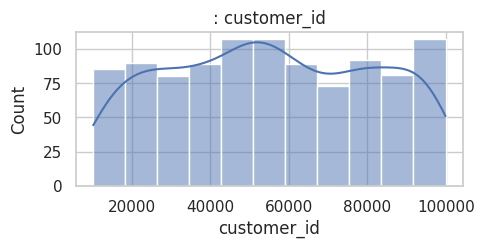

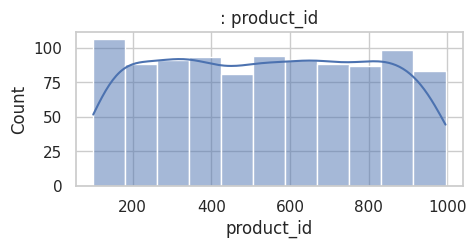

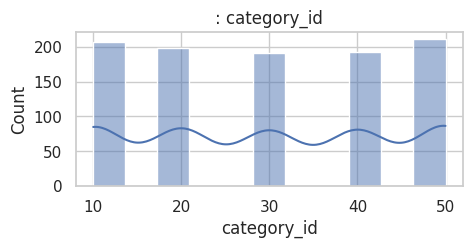

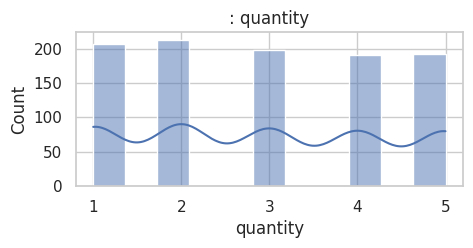

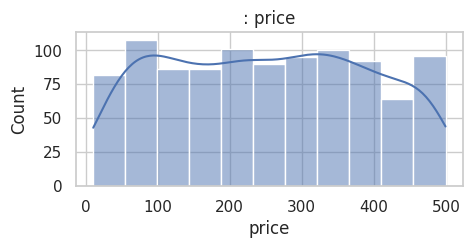

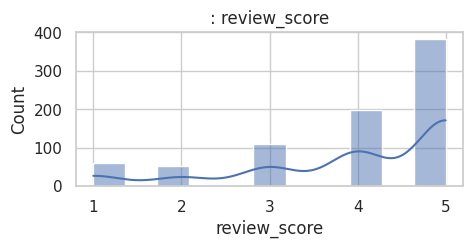

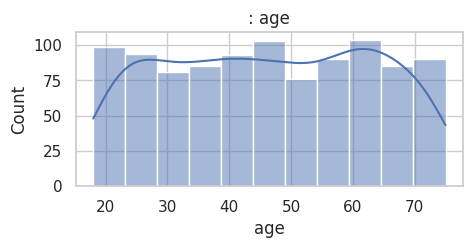


📊 التحليل الأحادي - متغيرات فئوية


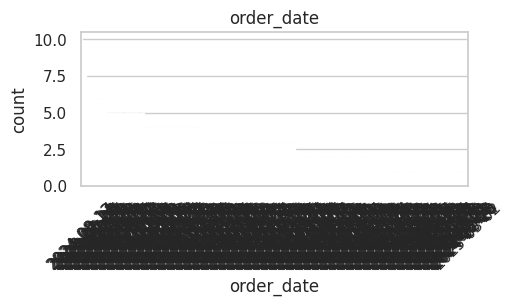

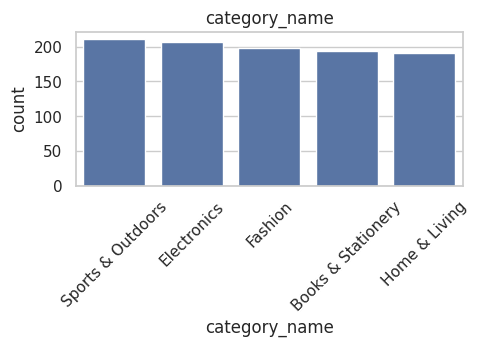

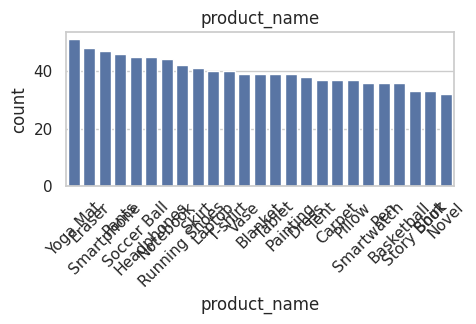

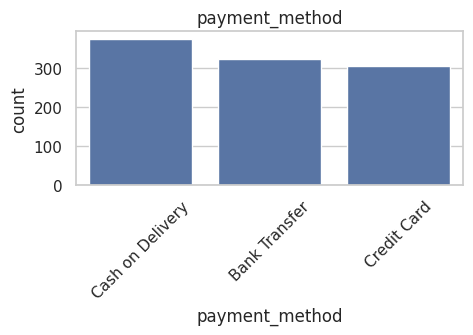

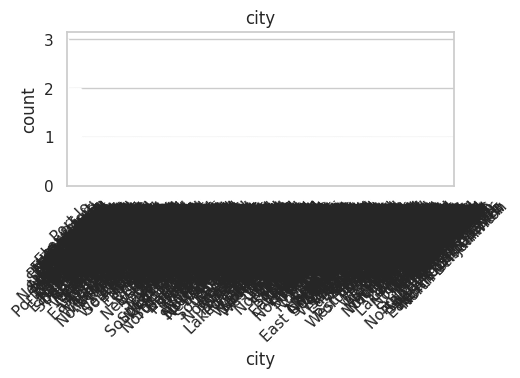

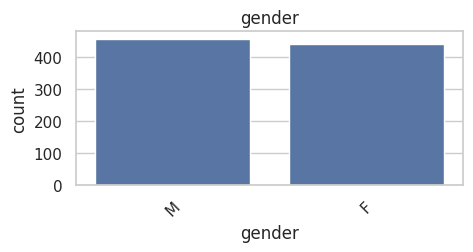

In [ ]:
print("\n📊 التحليل الأحادي - متغيرات رقمية")
for col in numerical_cols:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f': {col}')
    plt.show()

print("\n📊 التحليل الأحادي - متغيرات فئوية")
for col in categorical_cols:
    plt.figure()
    sns.countplot(x=df[col], order=df[col].value_counts().index)
    plt.title(f'{col}')
    plt.xticks(rotation=45)
    plt.show()

# **Bivariate Analysis with Target**


📈 التحليل الثنائي - عددية مقابل الهدف


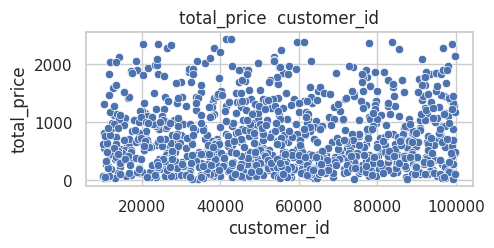

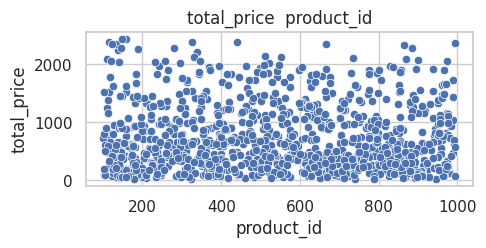

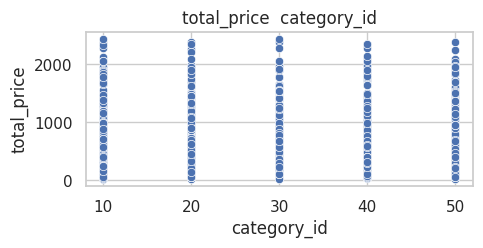

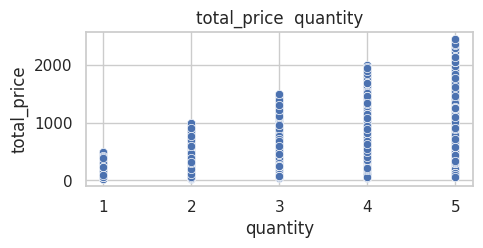

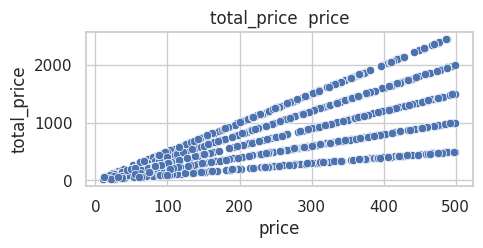

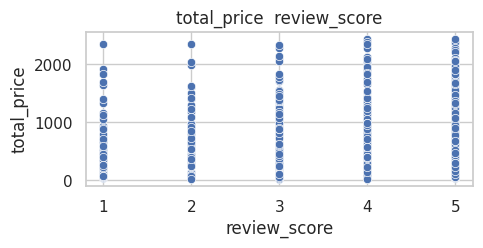

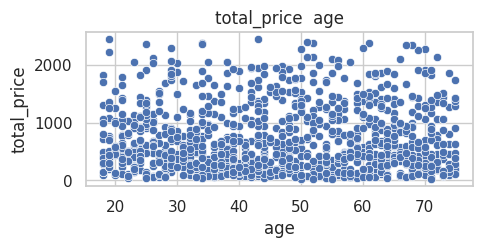


📈 التحليل الثنائي - فئوية مقابل الهدف


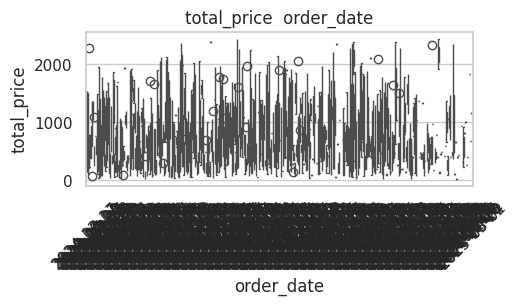

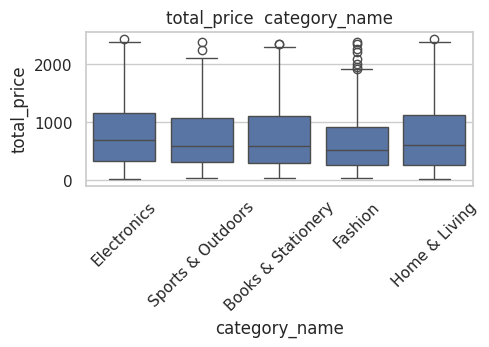

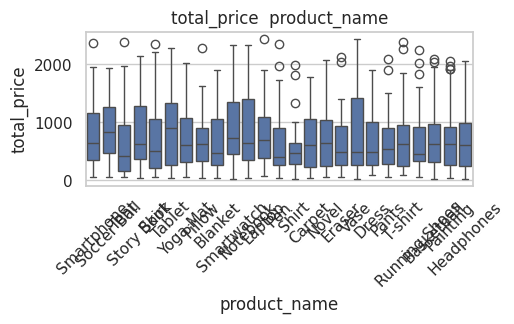

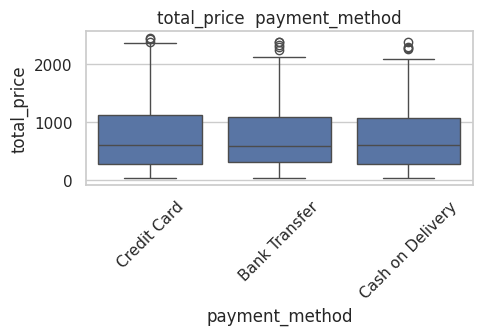

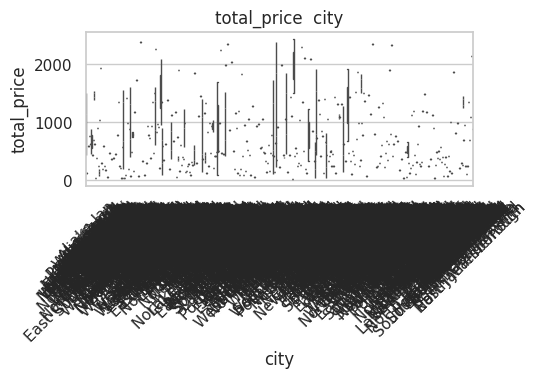

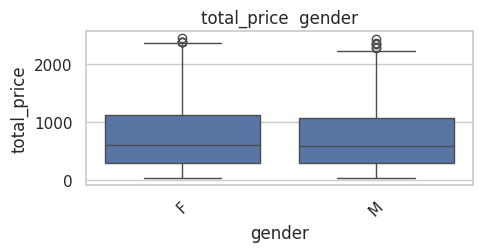

In [ ]:
print("\n📈 التحليل الثنائي - عددية مقابل الهدف")
for col in numerical_cols:
    plt.figure()
    sns.scatterplot(data=df, x=col, y=target)
    plt.title(f'{target}  {col}')
    plt.show()

print("\n📈 التحليل الثنائي - فئوية مقابل الهدف")
for col in categorical_cols:
    plt.figure()
    sns.boxplot(data=df, x=col, y=target)
    plt.title(f'{target}  {col}')
    plt.xticks(rotation=45)
    plt.show()

# **Multivariate Analysis**


🌐 التحليل المتعدد - Heatmap


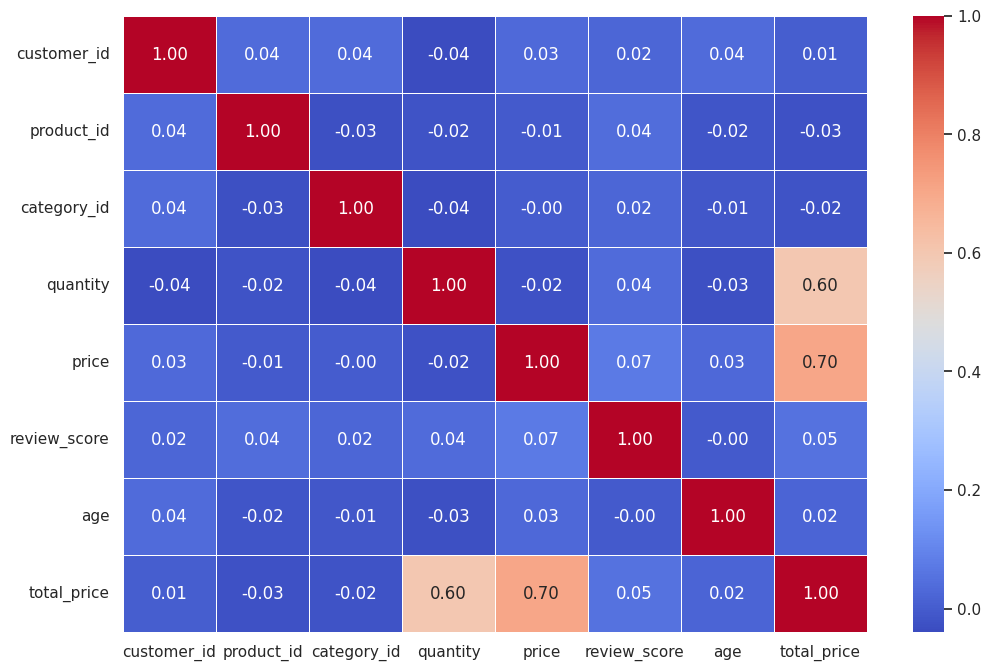

In [ ]:
print("\n🌐 التحليل المتعدد - Heatmap")
plt.figure(figsize=(12, 8))
corr = df[numerical_cols + [target]].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.show()

# **Preprocessing**

In [ ]:
# نسخ البيانات الأصلية
df_cleaned = df.copy()

# ------------ 1. معالجة القيم المفقودة ------------
for col in df_cleaned.columns:
    if df_cleaned[col].isnull().sum() > 0:
        if df_cleaned[col].dtype == 'object':
            df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].mode()[0])  # الأكثر تكرارًا
        else:
            df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].median())   # الوسيط
print("✅ تم معالجة القيم المفقودة.")

# ------------ 2. معالجة الأعمدة التاريخية (إن وُجدت) ------------
date_cols = [col for col in df_cleaned.columns if 'date' in col.lower()]
for col in date_cols:
    df_cleaned[col] = pd.to_datetime(df_cleaned[col])
    # استخراج ميزات جديدة: الشهر، اليوم، اليوم في الأسبوع
    df_cleaned[f'{col}_month'] = df_cleaned[col].dt.month
    df_cleaned[f'{col}_day'] = df_cleaned[col].dt.day
    df_cleaned[f'{col}_weekday'] = df_cleaned[col].dt.weekday
    df_cleaned.drop(columns=[col], inplace=True)
print("🗓️ تم تحويل الأعمدة الزمنية.")

# ------------ 3. تحويل المتغيرات الفئوية ------------
# تحديد المتغيرات الفئوية
cat_cols = df_cleaned.select_dtypes(include='object').columns.tolist()
df_cleaned = pd.get_dummies(df_cleaned, columns=cat_cols, drop_first=True)
print("🔠 تم تحويل المتغيرات الفئوية باستخدام One-Hot Encoding.")

# ------------ 4. معالجة القيم الشاذة (Outliers) ------------
num_cols = df_cleaned.select_dtypes(include='number').columns.tolist()
# إزالة العمود الهدف من الأعمدة الرقمية
if target in num_cols:
    num_cols.remove(target)

for col in num_cols:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_cleaned = df_cleaned[(df_cleaned[col] >= lower) & (df_cleaned[col] <= upper)]
print("🧹 تم تنظيف البيانات من القيم الشاذة.")

# ------------ 5. تحجيم البيانات (اختياري) ------------
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
features_to_scale = [col for col in df_cleaned.select_dtypes(include='number').columns if col != target]

df_cleaned[features_to_scale] = scaler.fit_transform(df_cleaned[features_to_scale])
print("📏 تم تحجيم البيانات الرقمية (Min-Max Scaling).")

# ------------ الشكل النهائي للبيانات ------------
print("\n✅ شكل البيانات النهائي:", df_cleaned.shape)
df_cleaned.head()


✅ تم معالجة القيم المفقودة.
🗓️ تم تحويل الأعمدة الزمنية.
🔠 تم تحويل المتغيرات الفئوية باستخدام One-Hot Encoding.
🧹 تم تنظيف البيانات من القيم الشاذة.
📏 تم تحجيم البيانات الرقمية (Min-Max Scaling).

✅ شكل البيانات النهائي: (890, 1003)


,customer_id,product_id,category_id,quantity,price,review_score,age,total_price,order_date_month,order_date_day,...,city_Williamsside,city_Williamston,city_Williamton,city_Woodshaven,city_Woodsport,city_Wrightfort,city_Wrightmouth,city_Wrightport,city_Yatesstad,gender_M
1,0.144747,0.650279,1.00,1.00,0.590491,0.5,0.719298,1496.70,0.454545,0.000000,...,False,False,False,False,False,False,False,False,False,True
2,0.500401,0.652514,1.00,1.00,0.025124,1.0,0.807018,115.00,0.090909,0.100000,...,False,False,False,False,False,False,False,False,False,False
3,0.613083,0.116201,0.75,0.25,0.448852,1.0,0.280702,460.22,0.818182,0.900000,...,False,False,False,False,False,False,False,False,False,True
5,0.220548,0.814525,0.00,0.75,0.379394,1.0,0.052632,784.64,1.000000,0.066667,...,False,False,False,False,False,False,False,False,False,False
6,0.775819,0.677095,0.00,1.00,0.536090,0.5,0.684211,1363.75,0.454545,0.200000,...,False,False,False,False,False,False,False,False,False,True
